Shape of the data: (64, 1024)
Data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


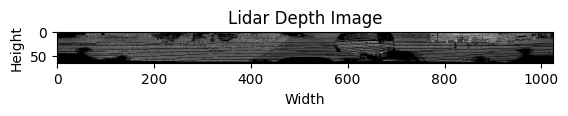

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Load the numpy file
file_path = "/DATA2/Vivek/Data/Downstream Task/Val/val_lidar_intensity/03_000186.npy"
data = np.load(file_path)

# Display the values
print("Shape of the data:", data.shape)
print("Data:")
print(data)



# Plot the data as an image
plt.imshow(data, cmap='gray')
plt.title('Lidar Depth Image')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

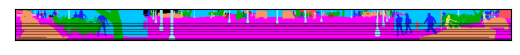

In [1]:
import numpy as np
import matplotlib.pyplot as plt

learning_map = {
    0: 0,     # "unlabeled"
    1: 0,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the inverse mapping dictionary
learning_map_inv = {
    0: 1,     # "unlabeled"
    1: 10,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the color mapping dictionary
color_map = {
    0: [0, 0, 0],
    1: [0, 0, 255],
    10: [245, 150, 100],
    11: [245, 230, 100],
    13: [250, 80, 100],
    15: [150, 60, 30],
    16: [255, 0, 0],
    18: [180, 30, 80],
    20: [255, 0, 0],
    30: [30, 30, 255],
    31: [200, 40, 255],
    32: [90, 30, 150],
    40: [255, 0, 255],
    44: [255, 150, 255],
    48: [75, 0, 75],
    49: [75, 0, 175],
    50: [0, 200, 255],
    51: [50, 120, 255],
    52: [0, 150, 255],
    60: [170, 255, 150],
    70: [0, 175, 0],
    71: [0, 60, 135],
    72: [80, 240, 150],
    80: [150, 240, 255],
    81: [0, 0, 255],
    99: [255, 255, 50],
    252: [245, 150, 100],
    256: [255, 0, 0],
    253: [200, 40, 255],
    254: [30, 30, 255],
    255: [90, 30, 150],
    257: [250, 80, 100],
    258: [180, 30, 80],
    259: [255, 0, 0]
}

# Load the NumPy file
file_path = '/DATA2/Vivek/Vivekk/Data/VoxelScape/Data/Test/test_lidar_label_np/10_000075.npy'
data = np.load(file_path)

# Define inverse mapping function (assuming keys are unique)
def inverse_map(val):
  for key, value in learning_map.items():
    if value == val:
      return key
  return 0  # Assign unlabeled value if not found

# Apply inverse mapping to the data
data_mapped = np.vectorize(inverse_map)(data)

# Create color image based on color map
color_image = np.empty((data.shape[0], data.shape[1], 3), dtype=np.uint8)
for i in range(data_mapped.shape[0]):
  for j in range(data_mapped.shape[1]):
    color_image[i, j] = color_map[data_mapped[i, j]]

# Display the color image without ticks and border
plt.imshow(color_image, extent=(0, data.shape[1], 0, data.shape[0]))  # Set extent
plt.xticks([])
plt.yticks([])
plt.show()

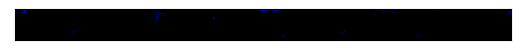

In [24]:
import numpy as np
import matplotlib.pyplot as plt

learning_map = {
    0: 1,     # "unlabeled"
    1: 1,     # "outlier" mapped to "unlabeled"
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle"
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle"
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled"
    60: 9,    # "lane-marking" to "road"
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled"
    252: 1,   # "moving-car" to "car"
    253: 7,   # "moving-bicyclist" to "bicyclist"
    254: 6,   # "moving-person" to "person"
    255: 8,   # "moving-motorcyclist" to "motorcyclist"
    256: 5,   # "moving-on-rails" mapped to "other-vehicle"
    257: 5,   # "moving-bus" mapped to "other-vehicle"
    258: 4,   # "moving-truck" to "truck"
    259: 5    # "moving-other-vehicle" to "other-vehicle"
}

# Define the color mapping dictionary
color_map = {
    0: [0, 0, 0],
    1: [0, 0, 255],
}

# Load the NumPy file
file_path = '/DATA2/Vivek/Data/Downstream Task/Val/test_val_lidar_label/08_000653.npy'
data = np.load(file_path)

# Filter out values other than 9
filtered_data = np.where(data == 1, data, 0)

# Create color image based on color map
color_image = np.empty((data.shape[0], data.shape[1], 3), dtype=np.uint8)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        try:
            color_image[i, j] = color_map[filtered_data[i, j]]
        except KeyError:
            color_image[i, j] = [255, 255, 255]  # Default color for unknown value

# Display the color image without ticks and border
plt.imshow(color_image, extent=(0, data.shape[1], 0, data.shape[0]))  # Set extent
plt.xticks([])
plt.yticks([])
plt.show()


In [37]:
#Checking the float and long operation on label tensor 

import numpy as np
import torch

# Load the label file
label_file_path = "/DATA2/Vivek/Data/Downstream Task/Train/train_lidar_depth/05_000432.npy"
semantic_image = np.load(label_file_path)

# Display the unique values before conversion
print("Semantic Image (Before Conversion):")
print(np.unique(semantic_image))

# Convert the label image to a PyTorch tensor and to long data type
semantic_tensor = torch.from_numpy(semantic_image).float()

# Display the unique values after conversion
print("\nSemantic Tensor (After Conversion):")
print(torch.unique(semantic_tensor))

Semantic Image (Before Conversion):
[ 0.          1.40660121  1.42535446 ... 79.61956951 79.64340308
 79.8028771 ]

Semantic Tensor (After Conversion):
tensor([ 0.0000,  1.4066,  1.4254,  ..., 79.6196, 79.6434, 79.8029])


In [40]:
import numpy as np

# Load the numpy file
file_path = '/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/08_000653.npy'
data = np.load(file_path)

# Find the unique values
unique_values = np.unique(data)

# Print the unique values
print("Unique values of the loaded numpy file:", unique_values)


Unique values of the loaded numpy file: [ 0.  9. 11. 13. 14. 15. 17. 18.]


In [37]:
import numpy as np

# Load the numpy file
file_path ='/DATA2/Vivek/Data/Downstream Task/Val/label_test_lidar/08_000653.npy'
data = np.load(file_path)

# Find the unique values and their counts
unique_values, counts = np.unique(data, return_counts=True)

# Print the unique values and their counts
print("Unique values of the loaded numpy file and their counts:")
for value, count in zip(unique_values, counts):
    print(f"Label: {value}, Points: {count}")


Unique values of the loaded numpy file and their counts:
Label: 0.0, Points: 22240
Label: 9.0, Points: 7356
Label: 11.0, Points: 9725
Label: 13.0, Points: 5129
Label: 14.0, Points: 31
Label: 15.0, Points: 13954
Label: 17.0, Points: 6982
Label: 18.0, Points: 119


In [21]:
import numpy as np

# Load the numpy file
file_path = "/DATA2/Vivek/Data/Downstream Task/Train/train_lidar_depth/05_000432.npy"
data = np.load(file_path)

# Display the shape of the data
print("Shape of the data:", data.shape)

# Display each element of the data
print("Data:")
for row in data:
    for element in row:
        print(element, end=' ')
    print()


Shape of the data: (64, 1024)
Data:
0.0 0.0 0.0 0.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 0.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 0.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 0.0 0.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 0.0 0.0 0.0 0.0 0.0 15.0 0.0 15.0 15.0 0.0 0.0 0.0 0.0 15.0 15.0 15.0 15.0 0.0 15.0 15.0 15.0 0.0 0.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 13.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 15.0 13.0 15.0 15.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 

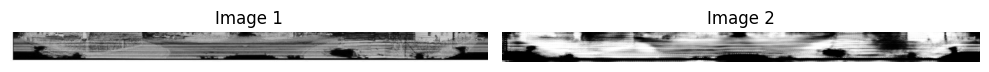

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def display_npy_images_grayscale(image_path1, image_path2):
    # Load the images
    image1 = np.load(image_path1)
    image2 = np.load(image_path2)

    # Create a figure and axis
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the first image
    axs[0].imshow(image1, cmap='gray')
    axs[0].set_title('Image 1')
    axs[0].axis('off')  # Hide the axis

    # Display the second image
    axs[1].imshow(image2, cmap='gray')
    axs[1].set_title('Image 2')
    axs[1].axis('off')  # Hide the axis

    # Show the plot
    plt.tight_layout()
    plt.show()

filename = '05_001536.npy'

# Example usage
image_path1 = f'/DATA2/Vivek/Data/Downstream Task/Test/test_lidar_intensity_gt/{filename}'
image_path2 = f'/DATA2/Vivek/Data/Downstream Task/Test/test_lidar_cycle_intensity/{filename}'
display_npy_images_grayscale(image_path1, image_path2)


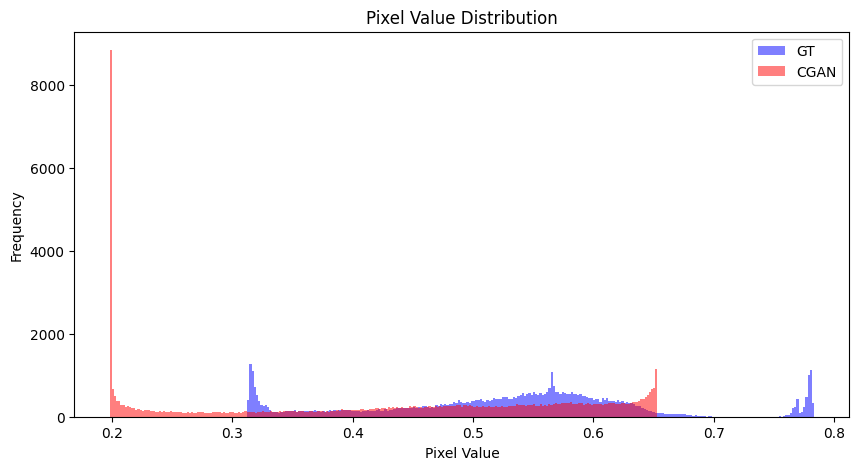

In [19]:
def plot_pixel_distribution(image_path1, image_path2):
    # Load the images
    image1 = np.load(image_path1)
    image2 = np.load(image_path2)

    # Flatten the images to 1D arrays
    pixels1 = image1.flatten()
    pixels2 = image2.flatten()

    # Create a figure and axis for plotting histograms
    plt.figure(figsize=(10, 5))

    # Plot the histogram for the first image
    plt.hist(pixels1, bins=256, alpha=0.5, label='GT', color='blue')

    # Plot the histogram for the second image
    plt.hist(pixels2, bins=256, alpha=0.5, label='CGAN', color='red')

    # Add title and labels
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot
    plt.show()


# Plot the pixel value distribution
plot_pixel_distribution(image_path1, image_path2)

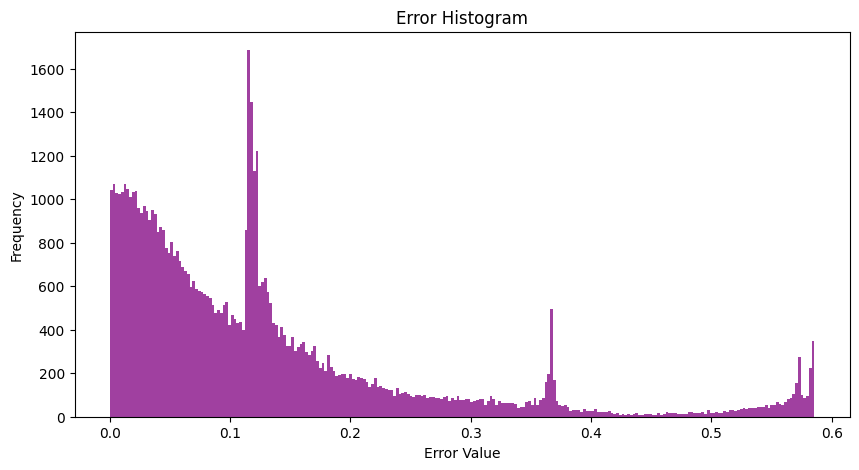

In [20]:
def plot_error_histogram(image_path1, image_path2):
    # Load the images
    image1 = np.load(image_path1)
    image2 = np.load(image_path2)

    # Calculate the difference between the images
    error_image = abs(image1 - image2)

    # Flatten the error image to a 1D array
    error_values = error_image.flatten()

    # Create a figure and axis for plotting the error histogram
    plt.figure(figsize=(10, 5))

    # Plot the histogram of the error values
    plt.hist(error_values, bins=256, alpha=0.75, color='purple')

    # Add title and labels
    plt.title('Error Histogram')
    plt.xlabel('Error Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

# Plot the error histogram
plot_error_histogram(image_path1, image_path2)

In [2]:
import os
import shutil
import random

def copy_files(input_path, output_path, file_count=100):
    # Ensure output path exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Traverse input directory
    for root, dirs, files in os.walk(input_path):
        # Get the relative path of the current directory to the input path
        relative_path = os.path.relpath(root, input_path)
        # Create corresponding directory in output path
        output_dir = os.path.join(output_path, relative_path)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        # Copy a fixed number of files from the current directory to the output directory
        if files:
            # Select 100 files randomly if there are more than 100 files
            files_to_copy = files if len(files) <= file_count else random.sample(files, file_count)
            for file_name in files_to_copy:
                src_file = os.path.join(root, file_name)
                dest_file = os.path.join(output_dir, file_name)
                shutil.copy2(src_file, dest_file)

# Example usage
input_path = '/DATA2/Vivek/Data/Trial_3/Test'
output_path = '/DATA2/Vivek/Data/Trial_3/Test/Subset'
os.makedirs(output_path, exist_ok=True)
copy_files(input_path, output_path)


In [4]:
import os
import shutil

def get_file_names_without_extension(directory):
    return [os.path.splitext(file)[0] for file in os.listdir(directory)]

def copy_files_based_on_reference(input_path, output_path, file_count=100):
    # Ensure output path exists
    os.makedirs(output_path, exist_ok=True)

    # Get the list of subdirectories in the input path
    subdirs = [d for d in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, d))]
    if not subdirs:
        print("No subdirectories found in the input path.")
        return

    # Use the first subfolder as a reference
    reference_subdir = os.path.join(input_path, subdirs[0])
    reference_file_names = get_file_names_without_extension(reference_subdir)
    reference_file_names = reference_file_names[:file_count]  # Take only the first 100 names if more are present

    for subdir in subdirs:
        current_subdir = os.path.join(input_path, subdir)
        output_subdir = os.path.join(output_path, subdir)
        os.makedirs(output_subdir, exist_ok=True)

        copied_files_count = 0
        for file_name in reference_file_names:
            if copied_files_count >= file_count:
                break

            # Find files in the current subdir that match the reference name
            matching_files = [file for file in os.listdir(current_subdir) if os.path.splitext(file)[0] == file_name]

            for src_file in matching_files:
                if copied_files_count >= file_count:
                    break

                src_file_path = os.path.join(current_subdir, src_file)
                dest_file_path = os.path.join(output_subdir, src_file)

                shutil.copy2(src_file_path, dest_file_path)
                copied_files_count += 1

# Example usage
input_path = '/DATA2/Vivek/Data/Trial_3/Test'
output_path = '/DATA2/Vivek/Data/Trial_3/Test_Subset'
os.makedirs(output_path, exist_ok=True)
copy_files_based_on_reference(input_path, output_path)
